C:\Users\joshf\AppData\Local\Temp\ipykernel_11120\706102283.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{target}_lag_{i}'] = data[target].shift(i)
C:\Users\joshf\AppData\Local\Temp\ipykernel_11120\706102283.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{target}_lag_{i}'] = data[target].shift(i)
c:\Users\joshf\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency


Forecasting Solar Energy Production


c:\Users\joshf\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Epoch [10/500], Train Loss: 0.9298, Val Loss: 1.6783
Epoch [20/500], Train Loss: 0.7959, Val Loss: 1.5196
Epoch [30/500], Train Loss: 0.5904, Val Loss: 1.2431
Epoch [40/500], Train Loss: 0.3170, Val Loss: 0.8719
Epoch [50/500], Train Loss: 0.1013, Val Loss: 0.5271
Epoch [60/500], Train Loss: 0.0270, Val Loss: 0.4195
Epoch [70/500], Train Loss: 0.0077, Val Loss: 0.3646
Epoch [80/500], Train Loss: 0.0026, Val Loss: 0.3160
Epoch [90/500], Train Loss: 0.0011, Val Loss: 0.3310
Epoch [100/500], Train Loss: 0.0007, Val Loss: 0.3349
Early stopping triggered after 101 epochs
Epoch [10/500], Train Loss: 0.9551, Val Loss: 1.7154
Epoch [20/500], Train Loss: 0.8674, Val Loss: 1.5769
Epoch [30/500], Train Loss: 0.6995, Val Loss: 1.3325
Epoch [40/500], Train Loss: 0.4452, Val Loss: 0.9783
Epoch [50/500], Train Loss: 0.1963, Val Loss: 0.6330
Epoch [60/500], Train Loss: 0.0686, Val Loss: 0.4438
Epoch [70/500], Train Loss: 0.0254, Val Loss: 0.4051
Epoch [80/500], Train Loss: 0.0121, Val Loss: 0.4172
Ear

c:\Users\joshf\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\joshf\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\joshf\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\joshf\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings

Epoch [10/500], Train Loss: 0.8649, Val Loss: 0.9522
Epoch [20/500], Train Loss: 0.7230, Val Loss: 0.7724
Epoch [30/500], Train Loss: 0.5257, Val Loss: 0.5776
Epoch [40/500], Train Loss: 0.3168, Val Loss: 0.4640
Epoch [50/500], Train Loss: 0.1743, Val Loss: 0.3191
Epoch [60/500], Train Loss: 0.0911, Val Loss: 0.2276
Epoch [70/500], Train Loss: 0.0637, Val Loss: 0.2187
Epoch [80/500], Train Loss: 0.0523, Val Loss: 0.2117
Epoch [90/500], Train Loss: 0.0457, Val Loss: 0.2136
Early stopping triggered after 97 epochs
Epoch [10/500], Train Loss: 0.9430, Val Loss: 1.0900
Epoch [20/500], Train Loss: 0.8336, Val Loss: 0.9630
Epoch [30/500], Train Loss: 0.6320, Val Loss: 0.7425
Epoch [40/500], Train Loss: 0.3546, Val Loss: 0.4791
Epoch [50/500], Train Loss: 0.1431, Val Loss: 0.3481
Epoch [60/500], Train Loss: 0.0971, Val Loss: 0.3138
Epoch [70/500], Train Loss: 0.0733, Val Loss: 0.2248
Epoch [80/500], Train Loss: 0.0602, Val Loss: 0.1832
Epoch [90/500], Train Loss: 0.0521, Val Loss: 0.1850
Epoch

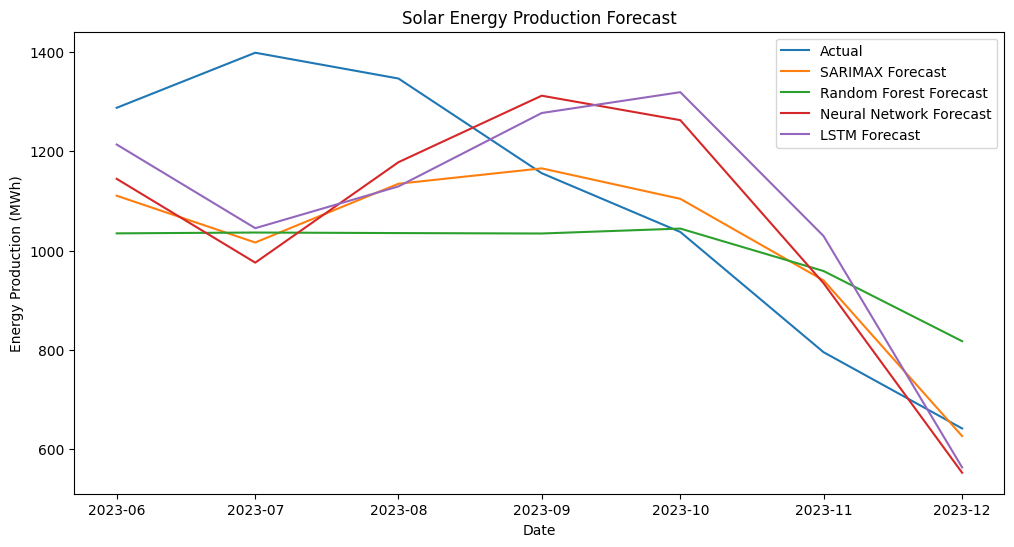

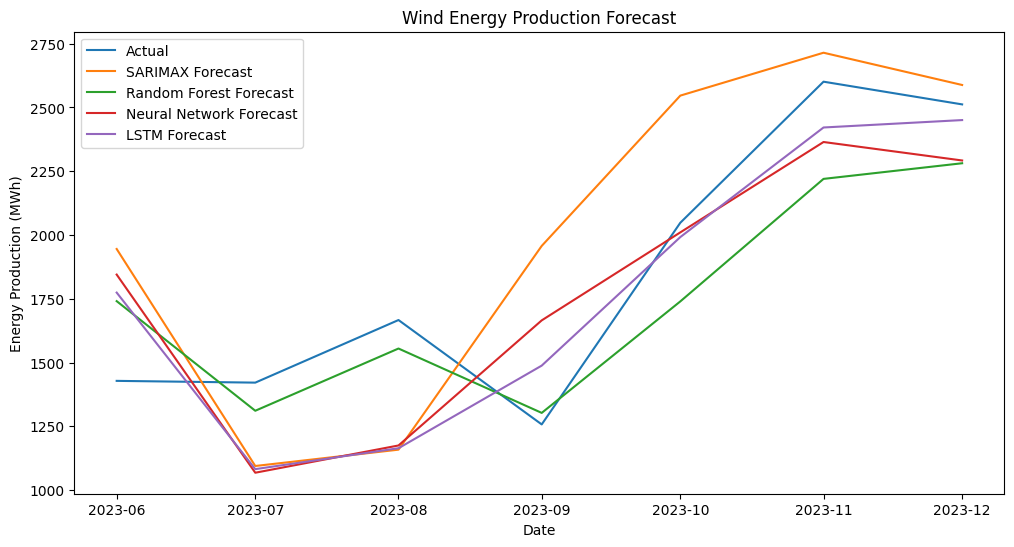

Forecasting and visualization complete. Check the '../docs/figures' directory for the generated PNG files.


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import json
import os

# Suppress FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

start_date = '2021-01-01'
end_date = '2023-12-31'
state_code = 'NY'  # New York

# Load data
merged_data = pd.read_csv(f'../data/{state_code}_renewable_energy_weather_data.csv')
merged_data['date'] = pd.to_datetime(merged_data['date'])

# Prepare data for forecasting
merged_data2 = merged_data.copy()
merged_data2['date'] = pd.to_datetime(merged_data2['date'])
merged_data2.set_index('date', inplace=True)

# Create features
def create_features(data, target, lag=3):
    for i in range(1, lag+1):
        data[f'{target}_lag_{i}'] = data[target].shift(i)
    
    # One-hot encode the month
    data['month'] = data.index.month
    data = pd.get_dummies(data, columns=['month'], prefix='month')
    
    return data.dropna()

# Prepare data
solar_data = create_features(merged_data2[['SUN', 'temp', 'wind_speed', 'precipitation']], 'SUN')
wind_data = create_features(merged_data2[['WND', 'temp', 'wind_speed', 'precipitation']], 'WND')

# Split data
train_size = int(len(solar_data) * 0.8)
solar_train, solar_test = solar_data[:train_size], solar_data[train_size:]
wind_train, wind_test = wind_data[:train_size], wind_data[train_size:]

# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{model_name} Performance:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"Root Mean Squared Error: {rmse:.2f}")
    print(f"R-squared Score: {r2:.2f}")

# SARIMAX model
def fit_sarimax(train, test, target):
    exog_cols = [col for col in train.columns if col != target and not col.startswith(f'{target}_lag')]
    model = SARIMAX(train[target], exog=train[exog_cols], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    results = model.fit()
    forecast = results.forecast(steps=len(test), exog=test[exog_cols])
    return forecast

# Random Forest model
def fit_random_forest(train, test, target):
    features = [col for col in train.columns if col != target]
    X_train, y_train = train[features], train[target]
    X_test = test[features]
    
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    forecast = rf_model.predict(X_test)
    return forecast

class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1)
        )
    
    def forward(self, x):
        return self.layers(x)

class SimpleLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(SimpleLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs, patience):
    best_val_loss = float('inf')
    epochs_no_improve = 0
    
    for epoch in range(epochs):
        model.train()
        train_loss = 0.0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for X_val, y_val in val_loader:
                y_pred = model(X_val)
                val_loss += criterion(y_pred, y_val).item()
        
        scheduler.step(val_loss)
        
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')
        
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
        
        if epochs_no_improve == patience:
            print(f'Early stopping triggered after {epoch + 1} epochs')
            break
    
    return model

def fit_nn_or_lstm(train, val, test, target, model_class, epochs=500, patience=20):
    features = [col for col in train.columns if col != target]
    X_train, y_train = train[features].values, train[target].values
    X_val, y_val = val[features].values, val[target].values
    X_test = test[features].values
    
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()
    
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_val_scaled = scaler_X.transform(X_val)
    X_test_scaled = scaler_X.transform(X_test)
    
    y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
    y_val_scaled = scaler_y.transform(y_val.reshape(-1, 1)).flatten()
    
    if model_class == SimpleLSTM:
        # Reshape input for LSTM (samples, time_steps, features)
        X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
        X_val_scaled = X_val_scaled.reshape((X_val_scaled.shape[0], 1, X_val_scaled.shape[1]))
        X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))
    
    X_train_tensor = torch.FloatTensor(X_train_scaled)
    y_train_tensor = torch.FloatTensor(y_train_scaled).reshape(-1, 1)
    X_val_tensor = torch.FloatTensor(X_val_scaled)
    y_val_tensor = torch.FloatTensor(y_val_scaled).reshape(-1, 1)
    X_test_tensor = torch.FloatTensor(X_test_scaled)
    
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
    
    if model_class == SimpleNN:
        model = SimpleNN(X_train.shape[1])
    else:  # LSTM
        model = SimpleLSTM(X_train.shape[1], hidden_size=64, num_layers=2)
    
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.5, patience=5)
    
    model = train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs, patience)
    
    model.eval()
    with torch.no_grad():
        forecast_scaled = model(X_test_tensor).numpy().flatten()
    
    forecast = scaler_y.inverse_transform(forecast_scaled.reshape(-1, 1)).flatten()
    
    return forecast

# Fit and evaluate models
def get_mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

def fit_and_evaluate_all(train, test, target):
    # Split train data into train and validation sets
    train_data, val_data = train_test_split(train, test_size=0.2, random_state=42)
    
    sarimax_forecast = fit_sarimax(train, test, target)
    rf_forecast = fit_random_forest(train, test, target)
    nn_forecast = fit_nn_or_lstm(train_data, val_data, test, target, SimpleNN)
    lstm_forecast = fit_nn_or_lstm(train_data, val_data, test, target, SimpleLSTM)
    
    mae_values = {
        'SARIMAX': get_mae(test[target], sarimax_forecast),
        'Random Forest': get_mae(test[target], rf_forecast),
        'Neural Network': get_mae(test[target], nn_forecast),
        'LSTM': get_mae(test[target], lstm_forecast)
    }
    
    forecasts = {
        'SARIMAX': sarimax_forecast,
        'Random Forest': rf_forecast,
        'Neural Network': nn_forecast,
        'LSTM': lstm_forecast
    }
    
    return mae_values, forecasts

# Run the models and get MAE values and forecasts
print("\nForecasting Solar Energy Production")
solar_mae, solar_forecasts = fit_and_evaluate_all(solar_train, solar_test, 'SUN')

print("\nForecasting Wind Energy Production")
wind_mae, wind_forecasts = fit_and_evaluate_all(wind_train, wind_test, 'WND')

# Ensure the directory exists
os.makedirs('../docs/figures', exist_ok=True)

# Save MAE values to a file
with open('../docs/mae_values.json', 'w') as f:
    json.dump({'solar': solar_mae, 'wind': wind_mae}, f)

# Plotting results
def plot_forecasts(test, actual, forecasts, title):
    plt.figure(figsize=(12,6))
    plt.plot(test.index, actual, label='Actual')
    for model, forecast in forecasts.items():
        plt.plot(test.index, forecast, label=f'{model} Forecast')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Energy Production (MWh)')
    plt.legend()
    plt.savefig(f'../docs/figures/{title.replace(" ", "_")}.png')
    plt.show()

plot_forecasts(solar_test, solar_test['SUN'], solar_forecasts, 'Solar Energy Production Forecast')
plot_forecasts(wind_test, wind_test['WND'], wind_forecasts, 'Wind Energy Production Forecast')

print("Forecasting and visualization complete. Check the '../docs/figures' directory for the generated PNG files.")

In [4]:
# Assuming you have the actual and forecasted values stored
# If not, you'll need to run your models again to get these values

# solar_test: your test data
# solar_forecasts: dictionary of forecasts from different models

solar_df = solar_test[['SUN']].copy()
for model, forecast in solar_forecasts.items():
    solar_df[f'{model}_Forecast'] = forecast

solar_df.to_csv('../docs/figures/solar_energy_forecast.csv')

In [5]:
# Similar to solar, but for wind data
wind_df = wind_test[['WND']].copy()
for model, forecast in wind_forecasts.items():
    wind_df[f'{model}_Forecast'] = forecast

wind_df.to_csv('../docs/figures/wind_energy_forecast.csv')